In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('data/narkolepsi_dataset.csv')
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].astype('category')
data['Riwayat_Family_Narkolepsi'] = data['Riwayat_Family_Narkolepsi'].astype('category')
data['Frekuensi_Kantuk_Siang'] = data['Frekuensi_Kantuk_Siang'].astype('category')
data['Pengalaman_Katapleksi'] = data['Pengalaman_Katapleksi'].astype('category')
data['Pengalaman_Hallusinasi_Tidur'] = data['Pengalaman_Hallusinasi_Tidur'].astype('category')
data['Pengalaman_Paralisis_Tidur'] = data['Pengalaman_Paralisis_Tidur'].astype('category')
data['Kualitas_Tidur_Malam'] = data['Kualitas_Tidur_Malam'].astype('category')
data['Frekuensi_Gangguan_Sleep'] = data['Frekuensi_Gangguan_Sleep'].astype('category')
data['Riwayat_Gangguan_Medis'] = data['Riwayat_Gangguan_Medis'].astype('category')
data['Kantuk_Dipicu_Emosi'] = data['Kantuk_Dipicu_Emosi'].astype('category')
# data['Label_Diagnosis_Narkolepsi'] = data['Label_Diagnosis_Narkolepsi'].replace({'Ya': 1, 'Tidak': 0}).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Usia                          1000 non-null   int64   
 1   Jenis_Kelamin                 1000 non-null   category
 2   Riwayat_Family_Narkolepsi     1000 non-null   category
 3   Frekuensi_Kantuk_Siang        1000 non-null   category
 4   Pengalaman_Katapleksi         1000 non-null   category
 5   Pengalaman_Hallusinasi_Tidur  1000 non-null   category
 6   Pengalaman_Paralisis_Tidur    1000 non-null   category
 7   Durasi_Tidur_Malam            1000 non-null   int64   
 8   Kualitas_Tidur_Malam          1000 non-null   category
 9   Durasi_Tidur_Siang            1000 non-null   int64   
 10  Frekuensi_Gangguan_Sleep      1000 non-null   category
 11  Riwayat_Gangguan_Medis        1000 non-null   category
 12  Tes_Sleep_Latency_MSLT        1000 non-null   flo

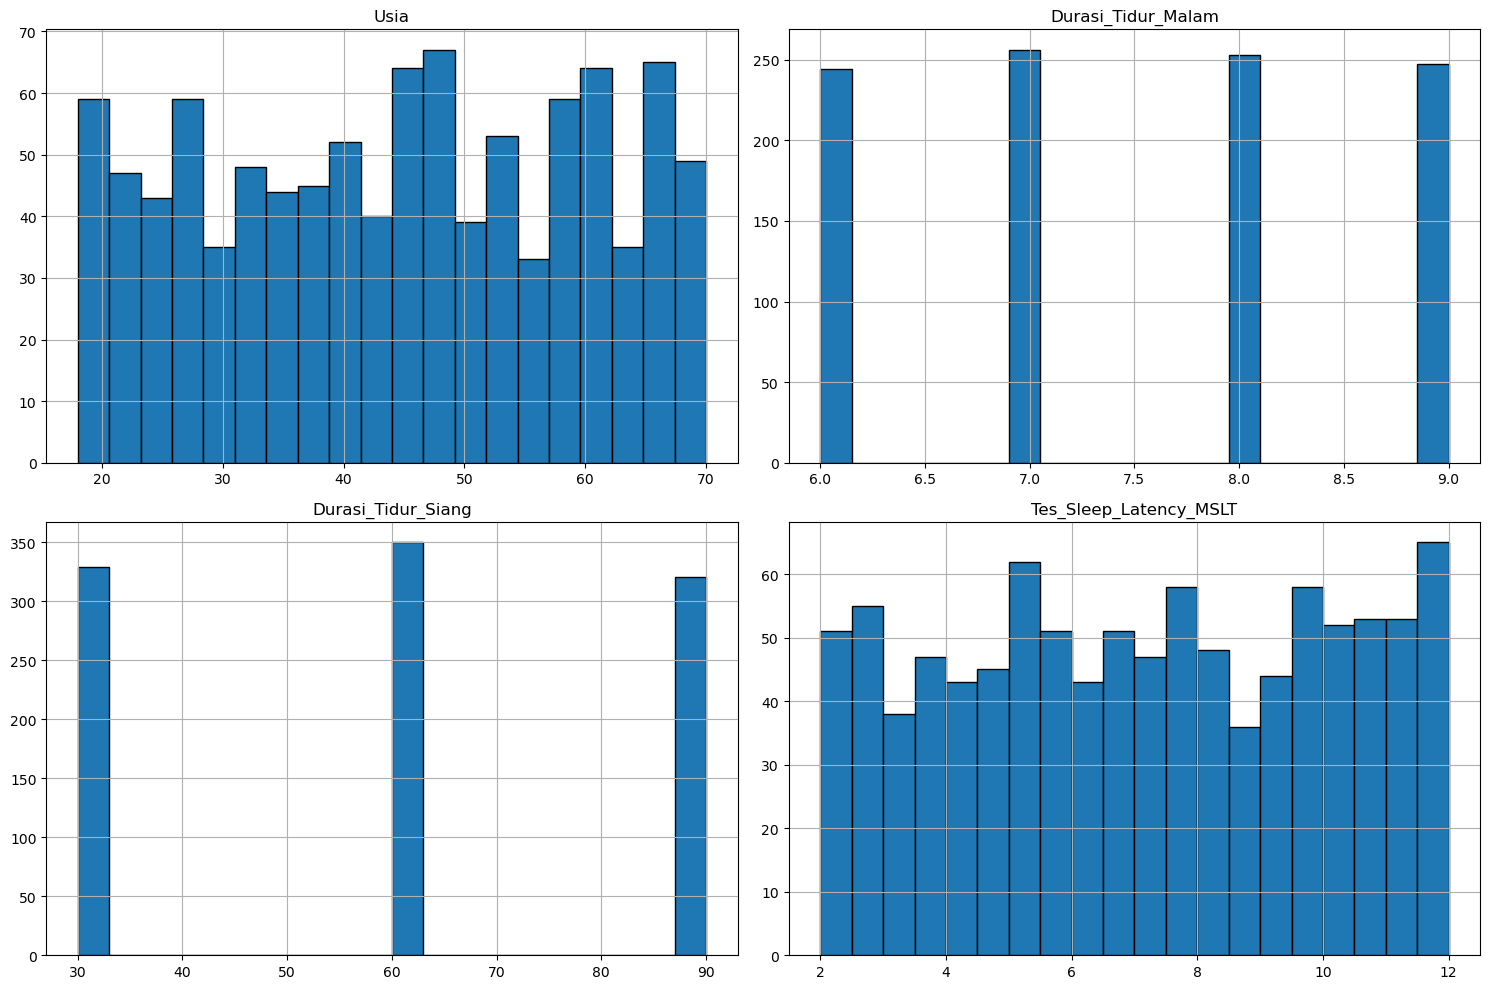

In [41]:
data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

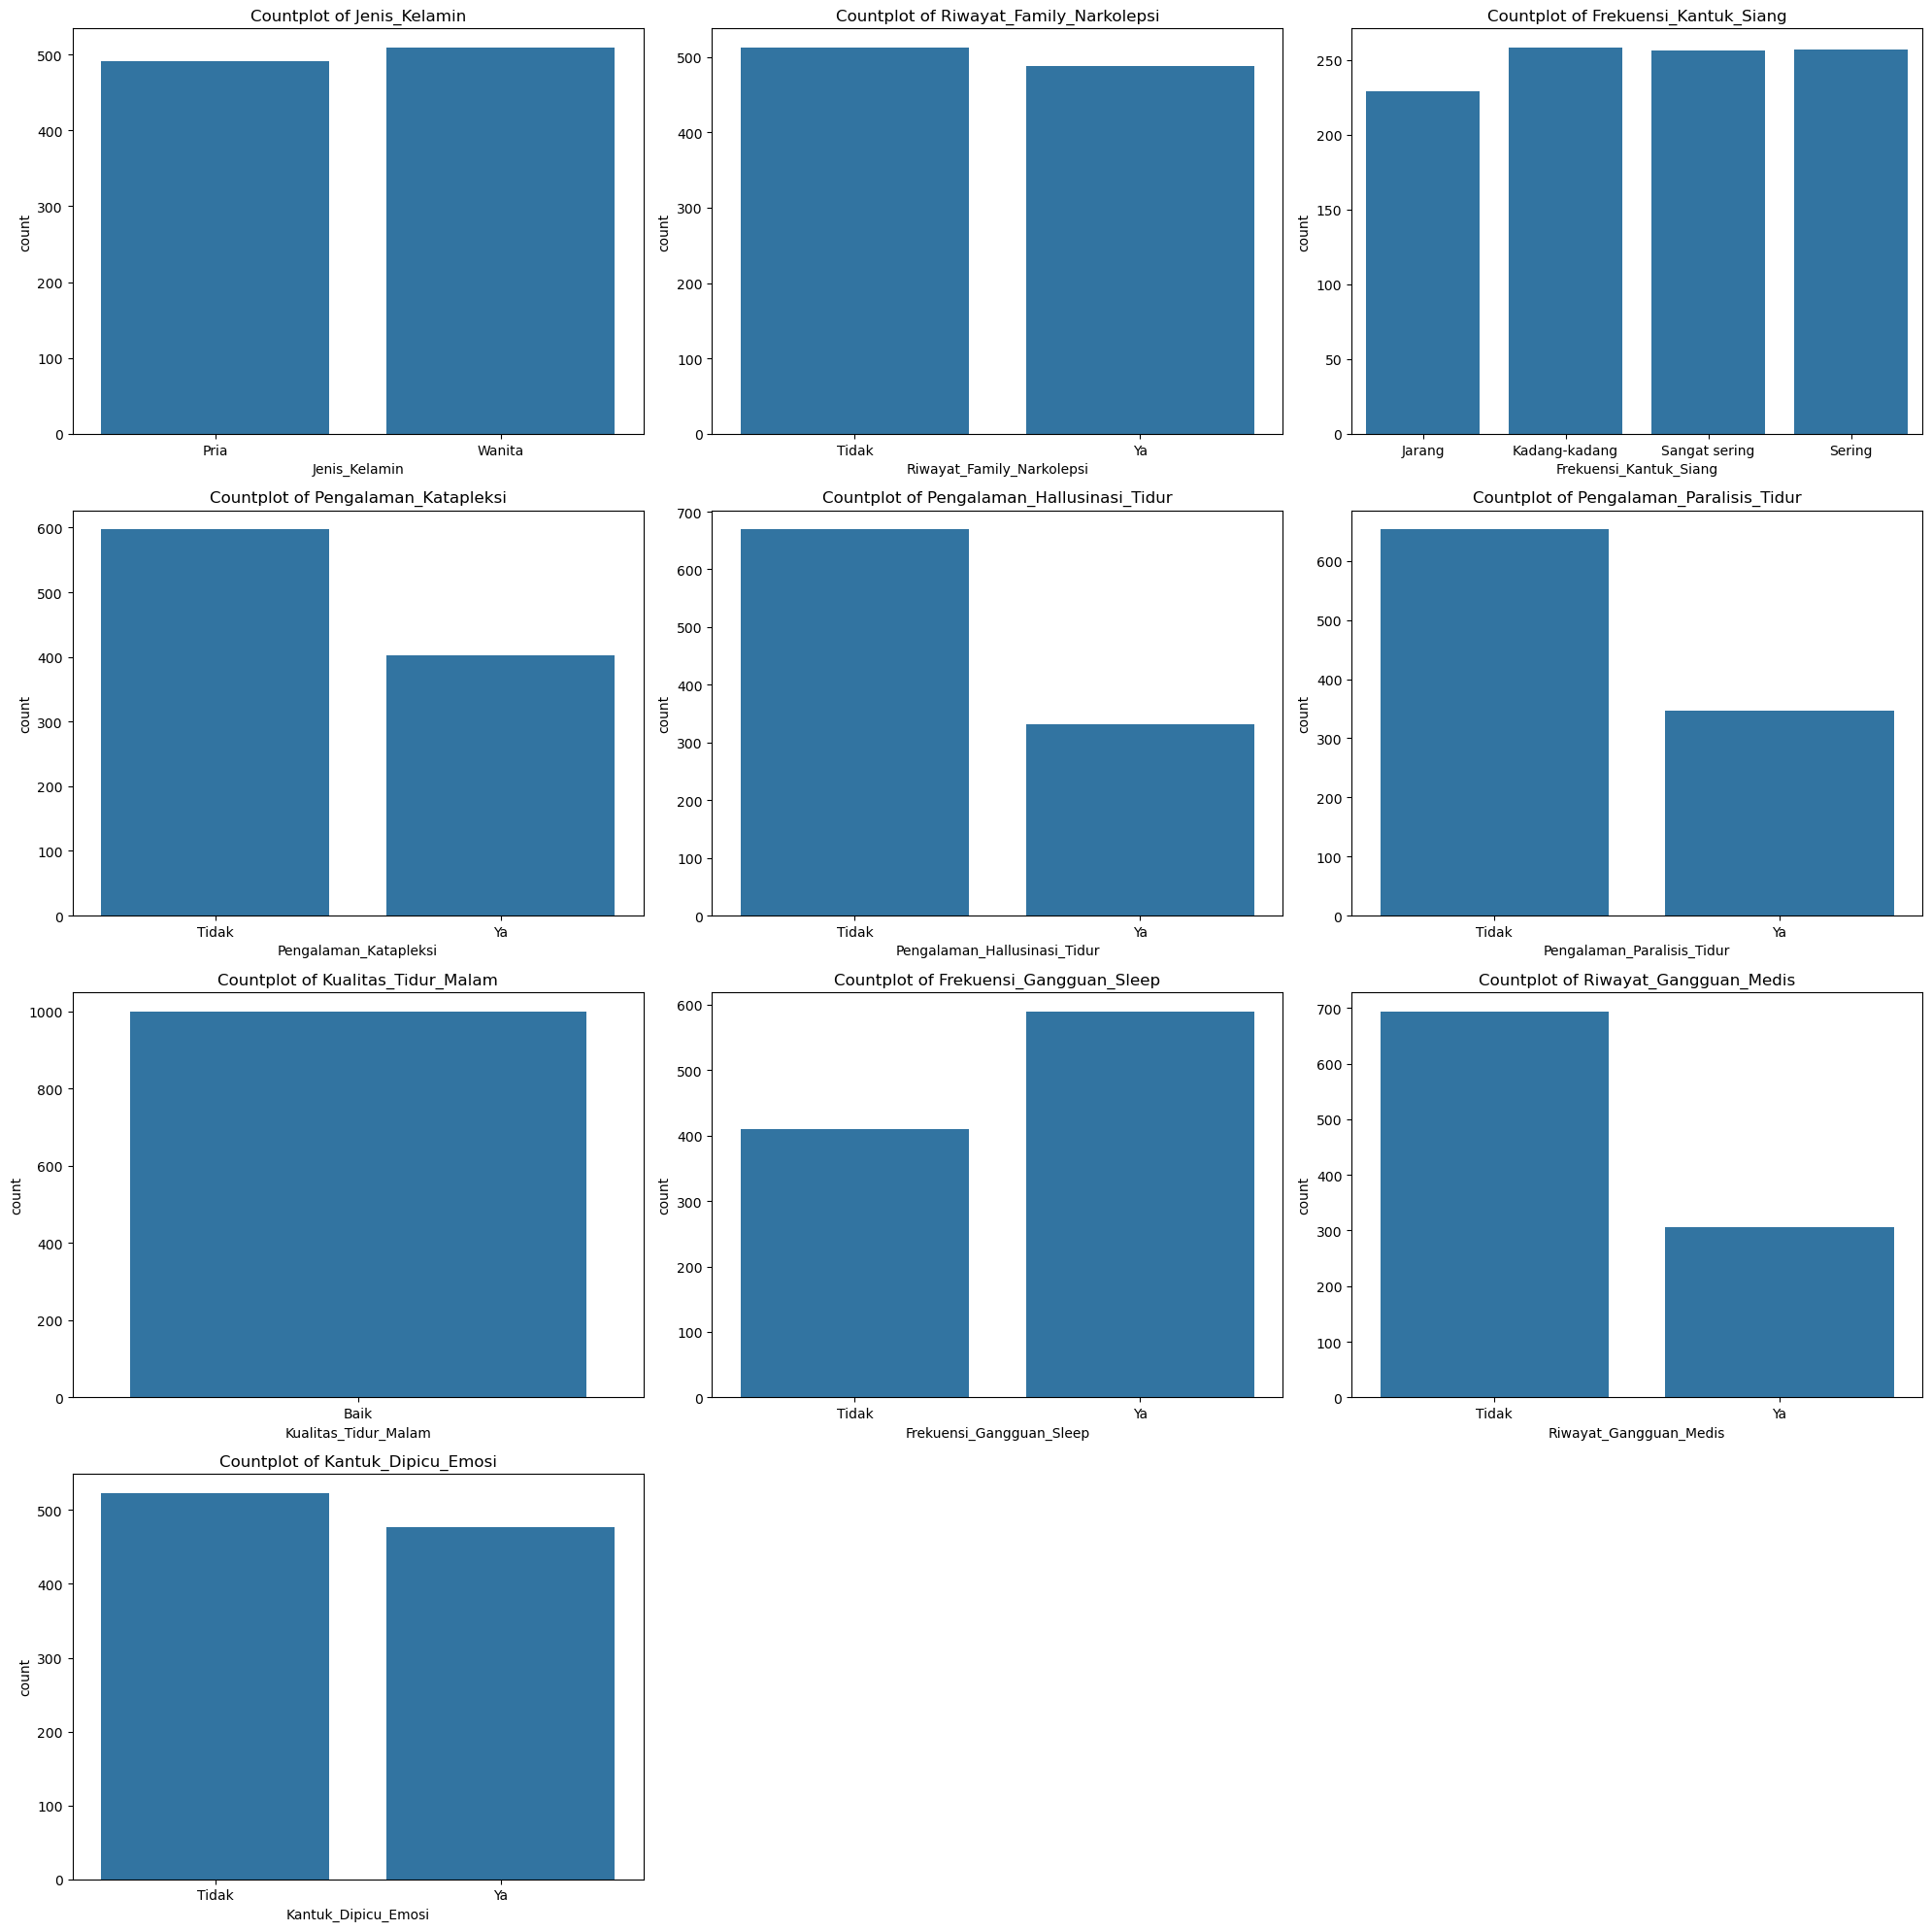

In [43]:
categorical_columns = data.select_dtypes(include=['category']).columns

num_cols = 3
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=data, x=column)
    plt.title(f'Countplot of {column}')
    plt.tight_layout()

plt.show()

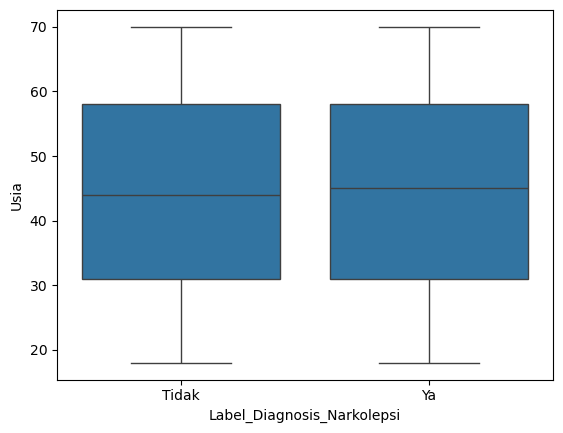

In [30]:
sns.boxplot(x='Label_Diagnosis_Narkolepsi', y='Usia', data=data)
plt.show()

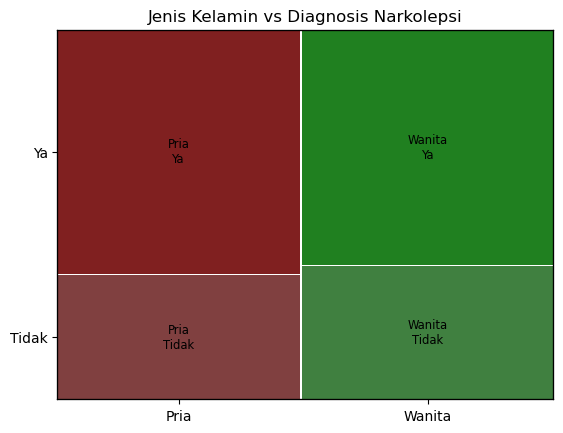

In [38]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(data, ['Jenis_Kelamin', 'Label_Diagnosis_Narkolepsi', ])
plt.title('Jenis Kelamin vs Diagnosis Narkolepsi')
plt.show()

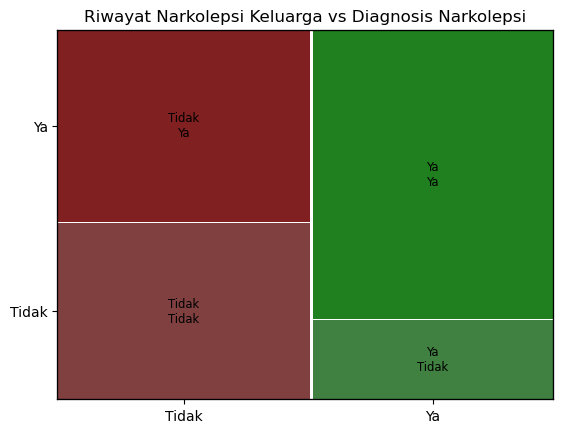

In [37]:
mosaic(data, ['Riwayat_Family_Narkolepsi', 'Label_Diagnosis_Narkolepsi'])
plt.title('Riwayat Narkolepsi Keluarga vs Diagnosis Narkolepsi')
plt.show()

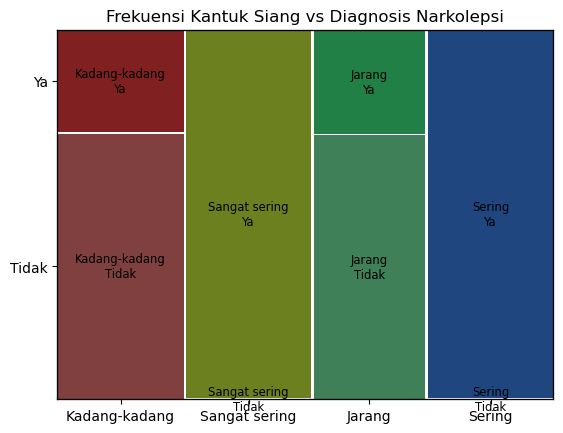

In [36]:
mosaic(data, ['Frekuensi_Kantuk_Siang', 'Label_Diagnosis_Narkolepsi'])
plt.title('Frekuensi Kantuk Siang vs Diagnosis Narkolepsi')
plt.show()

In [ ]:
mosaic(data, ['', 'Label_Diagnosis_Narkolepsi'])
plt.title('Frekuensi Kantuk Siang vs Diagnosis Narkolepsi')
plt.show()

In [3]:
data.head()

,Usia,Jenis_Kelamin,Riwayat_Family_Narkolepsi,Frekuensi_Kantuk_Siang,Pengalaman_Katapleksi,Pengalaman_Hallusinasi_Tidur,Pengalaman_Paralisis_Tidur,Durasi_Tidur_Malam,Kualitas_Tidur_Malam,Durasi_Tidur_Siang,Frekuensi_Gangguan_Sleep,Riwayat_Gangguan_Medis,Tes_Sleep_Latency_MSLT,Kantuk_Dipicu_Emosi,Label_Diagnosis_Narkolepsi
0,50,Pria,Tidak,Kadang-kadang,Ya,Tidak,Tidak,9,Baik,30,Ya,Tidak,7.1,Ya,0
1,34,Wanita,Tidak,Kadang-kadang,Tidak,Tidak,Tidak,7,Baik,30,Ya,Tidak,9.8,Tidak,0
2,24,Pria,Tidak,Kadang-kadang,Tidak,Tidak,Tidak,8,Baik,30,Ya,Tidak,3.2,Tidak,1
3,42,Pria,Tidak,Sangat sering,Ya,Tidak,Tidak,6,Baik,30,Tidak,Tidak,11.3,Ya,1
4,42,Pria,Tidak,Jarang,Ya,Tidak,Tidak,9,Baik,30,Ya,Tidak,10.5,Tidak,0


In [4]:
X = data.drop(columns=['Label_Diagnosis_Narkolepsi'])
y = data['Label_Diagnosis_Narkolepsi']

In [5]:
import xgboost as xgb

dmatrix = xgb.DMatrix(data=X, label=y, enable_categorical=True)

In [6]:
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Evaluation metric
    'learning_rate': 0.01,            # Learning rate (eta)
    'seed': 0
}

In [7]:
score_cv = xgb.cv(dtrain=dmatrix, params=params, nfold=5, num_boost_round=100000, early_stopping_rounds=300, as_pandas=True, seed=0)

In [8]:
score_cv

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.637572,0.005353,0.639173,0.019262
1,0.628057,0.005335,0.629623,0.018777
2,0.618757,0.005314,0.620289,0.018312
3,0.609664,0.005289,0.611163,0.017864
4,0.600771,0.005262,0.602238,0.017434
...,...,...,...,...
2707,0.003141,0.000031,0.003188,0.000149
2708,0.003141,0.000031,0.003188,0.000149
2709,0.003141,0.000031,0.003188,0.000149
2710,0.003141,0.000031,0.003188,0.000149


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
train_dm = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test_dm = xgb.DMatrix(data=X_test, label=y_test, enable_categorical=True)

In [10]:
bst = xgb.train(dtrain=train_dm, params=params, num_boost_round=1000000, evals=[(test_dm, 'test')], early_stopping_rounds=300, verbose_eval=5000)

[0]	test-logloss:0.63775
[5000]	test-logloss:0.00289
[10000]	test-logloss:0.00288
[15000]	test-logloss:0.00287
[20000]	test-logloss:0.00287
[25000]	test-logloss:0.00287
[26157]	test-logloss:0.00287


In [ ]:
import joblib

joblib.dump(X_train, 'model/train_data.pkl')
bst.save_model('model/xgb_narkolepsi.json')

              precision    recall  f1-score   support

       Tidak       1.00      1.00      1.00        70
          Ya       1.00      1.00      1.00       130

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

[[ 70   0]
 [  0 130]]


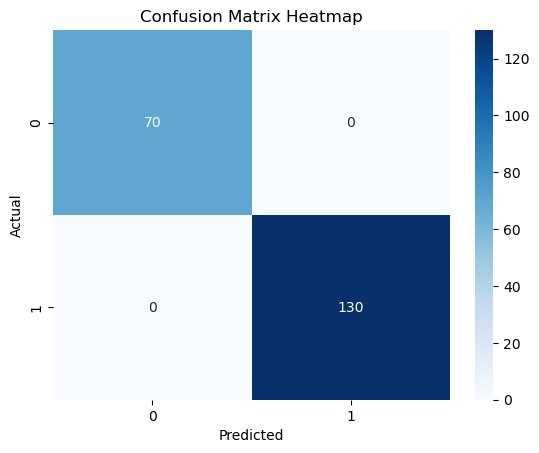

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, np.round(bst.predict(test_dm)), target_names=['Tidak', 'Ya']))
print(confusion_matrix(y_test, np.round(bst.predict(test_dm))))
sns.heatmap(confusion_matrix(y_test, np.round(bst.predict(test_dm))), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [12]:
shap_values_xgb = bst.predict(train_dm, pred_contribs=True)


In [13]:
shap_values_xgb.shape

(800, 15)

In [14]:
shap_values_xgb = shap_values_xgb[:, :-1]

In [15]:
pd.DataFrame(shap_values_xgb, columns=X_train.columns.tolist()).head()

,Usia,Jenis_Kelamin,Riwayat_Family_Narkolepsi,Frekuensi_Kantuk_Siang,Pengalaman_Katapleksi,Pengalaman_Hallusinasi_Tidur,Pengalaman_Paralisis_Tidur,Durasi_Tidur_Malam,Kualitas_Tidur_Malam,Durasi_Tidur_Siang,Frekuensi_Gangguan_Sleep,Riwayat_Gangguan_Medis,Tes_Sleep_Latency_MSLT,Kantuk_Dipicu_Emosi
0,-0.106659,-0.048914,0.299599,6.026715,0.0,0.0,0.0,-0.075610,0.0,0.0,0.075569,0.0,-1.139705,0.039874
1,0.059006,0.049444,-0.232880,2.968233,0.0,0.0,0.0,0.079772,0.0,0.0,-0.092535,0.0,3.011766,0.039874
2,-0.106659,0.049444,0.299599,6.026715,0.0,0.0,0.0,-0.075610,0.0,0.0,-0.092535,0.0,-1.139705,0.039874
3,-0.106659,0.049444,-0.232880,6.026715,0.0,0.0,0.0,-0.075610,0.0,0.0,-0.092535,0.0,-1.139705,0.039874
4,0.059006,0.049444,-0.232880,6.017822,0.0,0.0,0.0,-0.075610,0.0,0.0,-0.092535,0.0,-1.305620,-0.039469


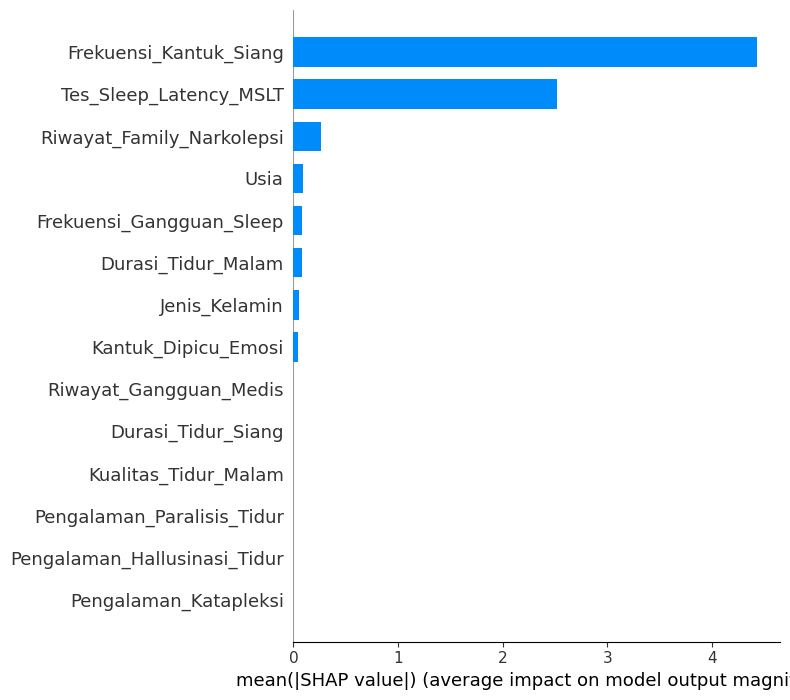

In [18]:
import shap

shap.summary_plot(
    shap_values_xgb, X_train, feature_names=X_train.columns, plot_type="bar"
)

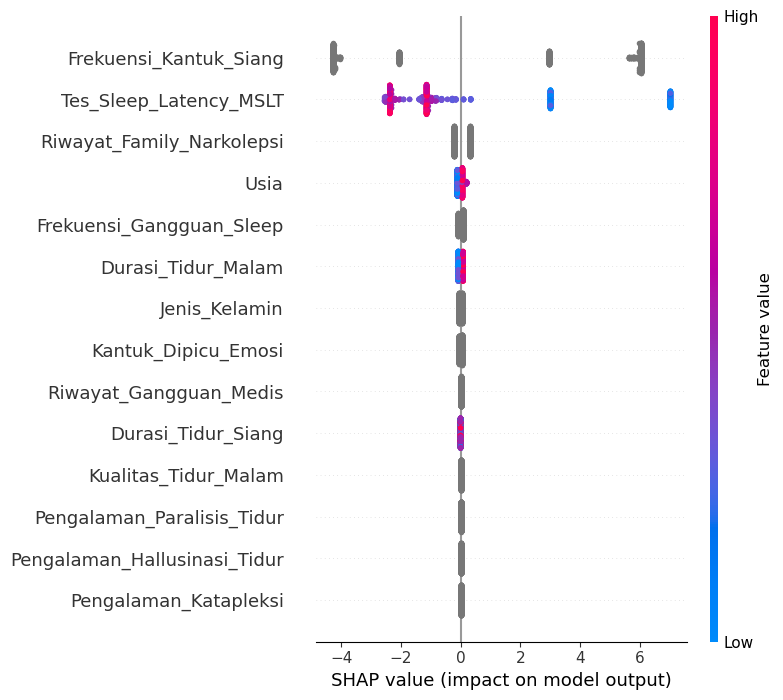

In [19]:
shap.summary_plot(shap_values_xgb, X_train, feature_names=X_train.columns);

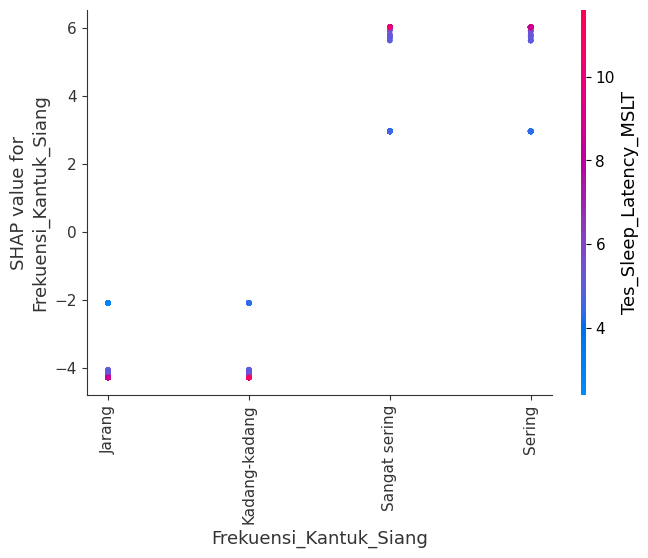

In [23]:
shap.dependence_plot('Frekuensi_Kantuk_Siang', shap_values_xgb, X_train, feature_names=X_train.columns)

columns='Usia'


c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


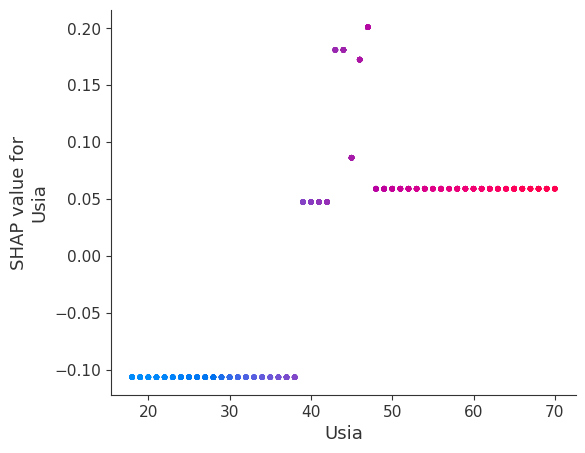

columns='Jenis_Kelamin'


c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


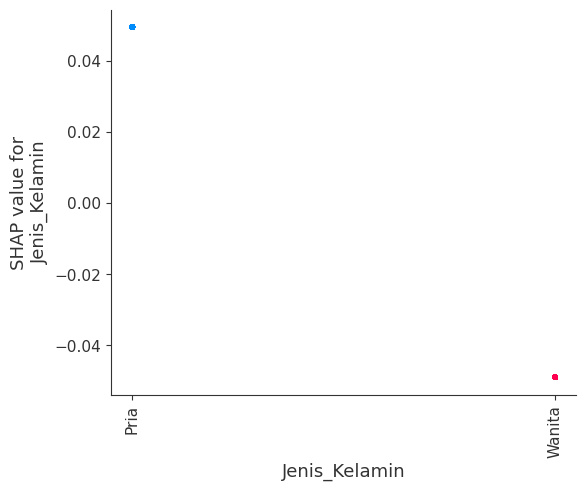

columns='Riwayat_Family_Narkolepsi'


c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


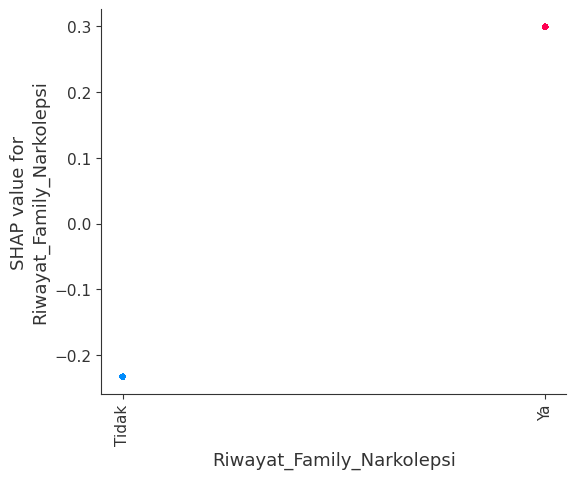

columns='Frekuensi_Kantuk_Siang'


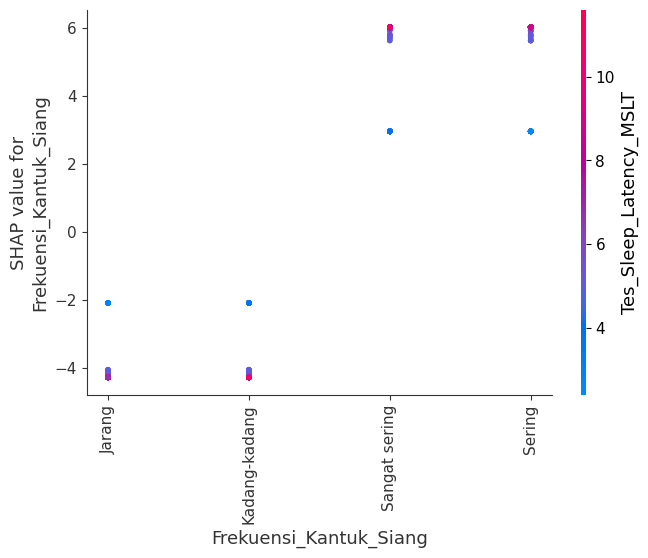

columns='Pengalaman_Katapleksi'


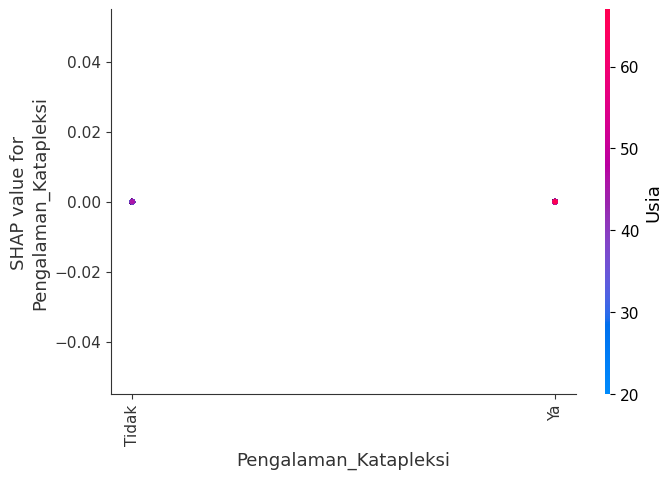

columns='Pengalaman_Hallusinasi_Tidur'


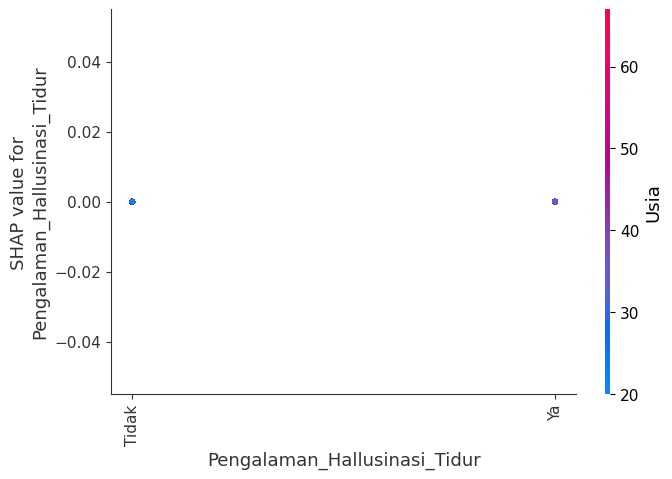

columns='Pengalaman_Paralisis_Tidur'


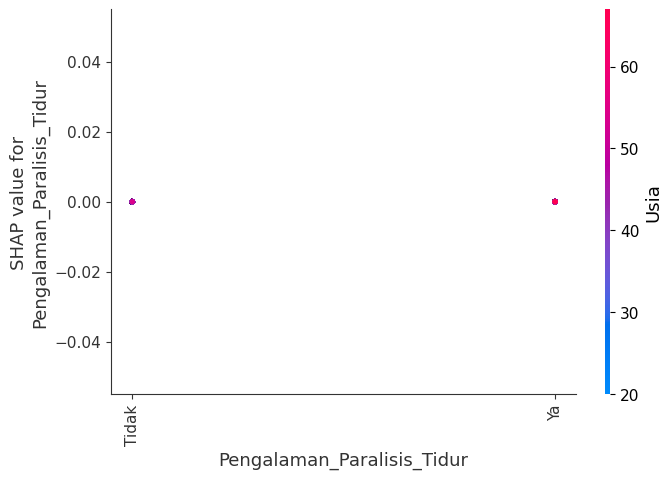

columns='Durasi_Tidur_Malam'


c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


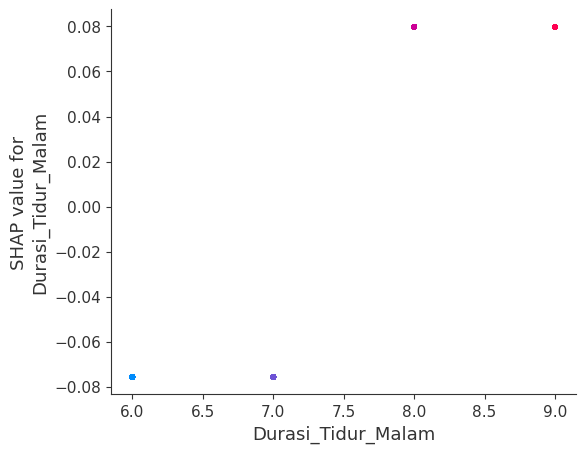

columns='Kualitas_Tidur_Malam'


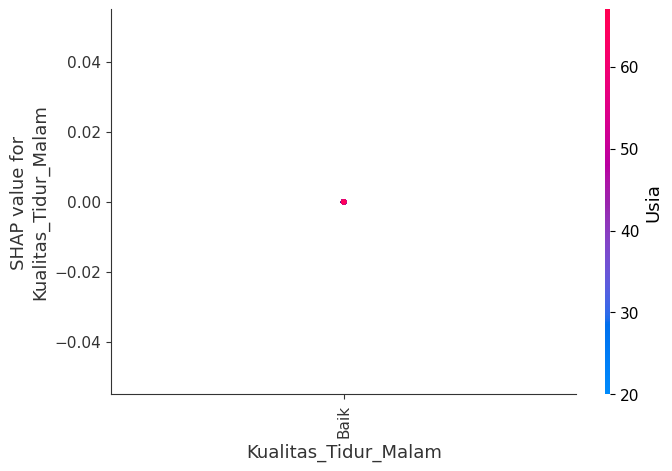

columns='Durasi_Tidur_Siang'


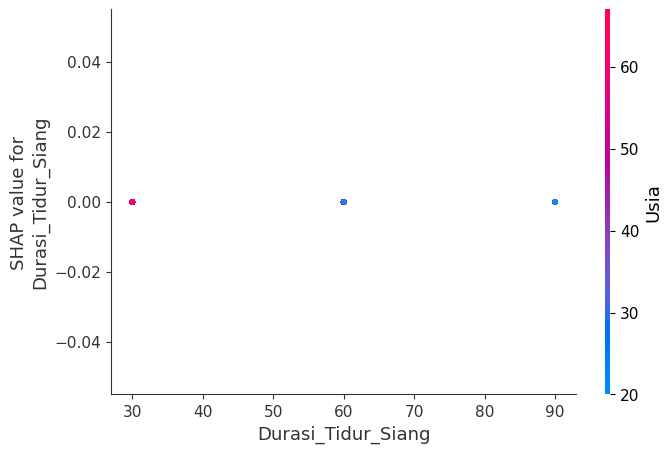

columns='Frekuensi_Gangguan_Sleep'


c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


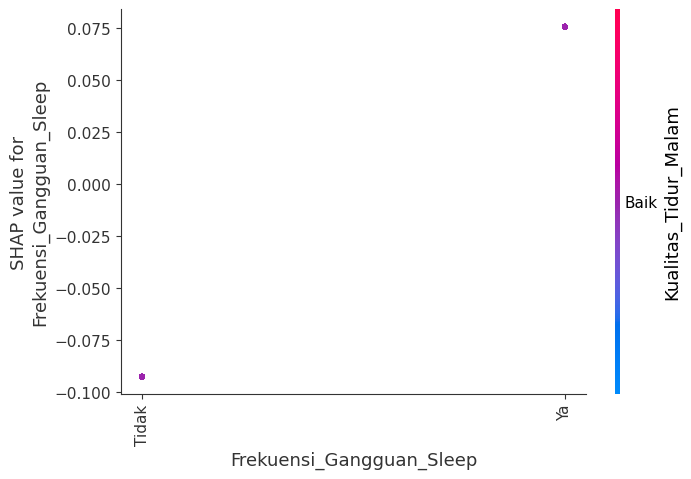

columns='Riwayat_Gangguan_Medis'


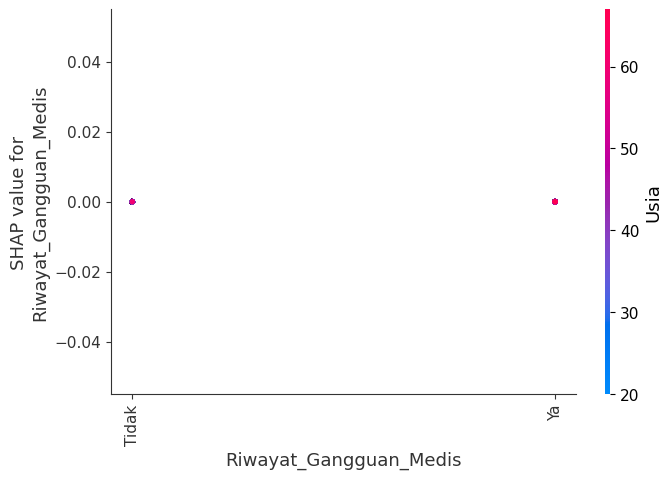

columns='Tes_Sleep_Latency_MSLT'


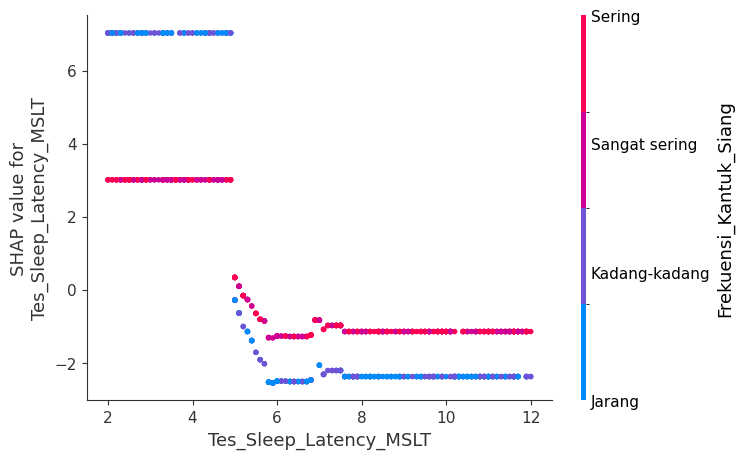

columns='Kantuk_Dipicu_Emosi'


c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\envs\narkolepsi_detector\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


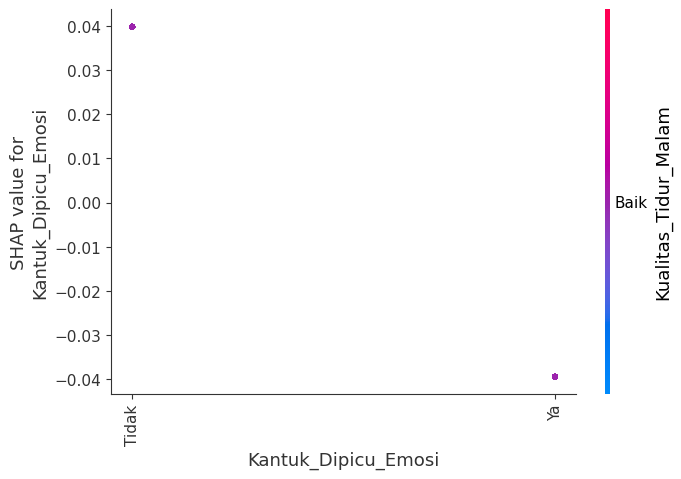

In [22]:
for columns in X_train.columns:
    print(f'{columns=}')
    shap.dependence_plot(columns, shap_values_xgb, X_train, feature_names=X_train.columns)